DDA algorithm

In [93]:
import numpy as np

def dda(origin, direction, max_cells=20, step_size=1.0):
    x, y = origin
    dx, dy = direction
    d = np.sqrt(dx*dx + dy*dy)
    dx /= d
    dy /= d

    cells = []
    for _ in range(max_cells):
        cells.append((round(x), round(y)))
        x += dx * step_size
        y += dy * step_size
    return cells


In [98]:
origin = (2,2)
direction = (1/5,1/2)
cells = dda(origin, direction)
end = cells[-1]

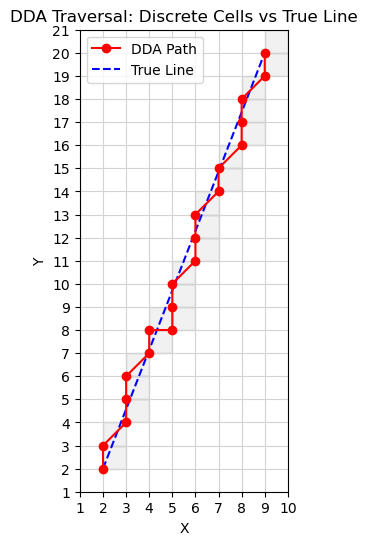

In [99]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Axis range with padding
x_min, x_max = min(c[0] for c in cells), max(c[0] for c in cells)
y_min, y_max = min(c[1] for c in cells), max(c[1] for c in cells)

fig, ax = plt.subplots(figsize=(6,6))

# --- Plot DDA stepped points
ax.plot([c[0] for c in cells], [c[1] for c in cells], 'ro-', label='DDA Path', zorder=3)

# --- Plot true line (continuous)
ax.plot([origin[0], end[0]], [origin[1], end[1]], 'b--', linewidth=1.5, label='True Line', zorder=2)

# --- Label each cell (optional)
#for x, y in cells:
#    ax.text(x, y, f'({x},{y})', ha='center', va='center', fontsize=8, color='black')

# --- Draw the grid cells (voxels)
for (x, y) in cells:
    rect = patches.Rectangle((x, y), 1, 1, 
                             edgecolor='gray', facecolor='lightgray', alpha=0.3)
    ax.add_patch(rect)

# --- Grid and axis setup
ax.set_aspect('equal')
ax.set_xticks(range(x_min - 1, x_max + 2))
ax.set_yticks(range(y_min - 1, y_max + 2))
ax.grid(True, color='lightgray', linestyle='-')
ax.set_xlim(x_min - 1, x_max + 1)
ax.set_ylim(y_min - 1, y_max + 1)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("DDA Traversal: Discrete Cells vs True Line")
ax.legend()

plt.show()
